In [8]:
import pandas as pd 
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [17]:
def food_statistics(filename_scoring,filename_chemicals):
    
    food_scoring_data = pd.read_csv(filename_scoring, encoding='latin1')[['PMID', 'abstract', 'paper', 'mesh_terms', 'qual_terms', 'is_useful']]

    food_scoring_data_usefulness = food_scoring_data['is_useful'].tolist()
    nonuseful_count = 0
    useful_count = 0

    for elem in food_scoring_data_usefulness:
        if elem == 0.0:
            nonuseful_count = nonuseful_count + 1
        else:
            useful_count = useful_count + 1

    food_usefulness_dict = dict()
    food_usefulness_dict['Useful'] = useful_count
    food_usefulness_dict['Not useful'] = nonuseful_count
    
    print(food_usefulness_dict)

    plt.figure(figsize=(20, 10)) 
    plt.bar(food_usefulness_dict.keys(),food_usefulness_dict.values())
    plt.ylabel('Paper count')
    plt.show()
    
    food_chemical_data = pd.read_csv(filename_chemicals, encoding='latin1')[['chemical','method']]
    
    print('Distinct chemicals found: ', len(set(food_chemical_data['chemical'].tolist())))
    print('Distinct measurement methods found: ', len(set(food_chemical_data['method'].tolist())))
    
    return

{'Useful': 193, 'Not useful': 222}


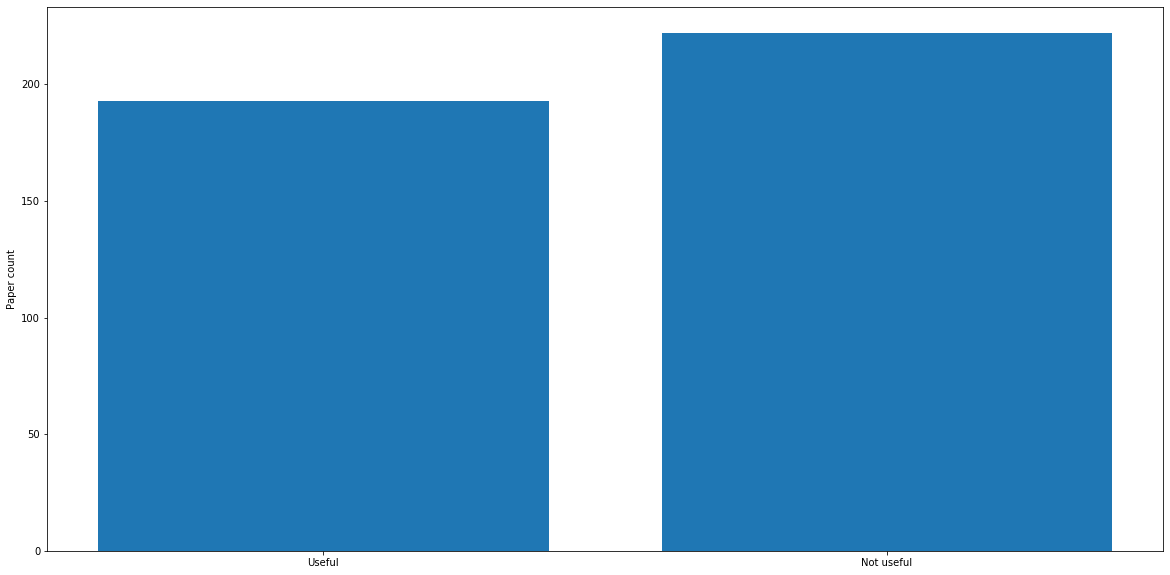

Distinct chemicals found:  371
Distinct measurement methods found:  72


In [18]:
food_statistics("garlic_scoring.csv","garlic_data.csv")

{'Useful': 244, 'Not useful': 231}


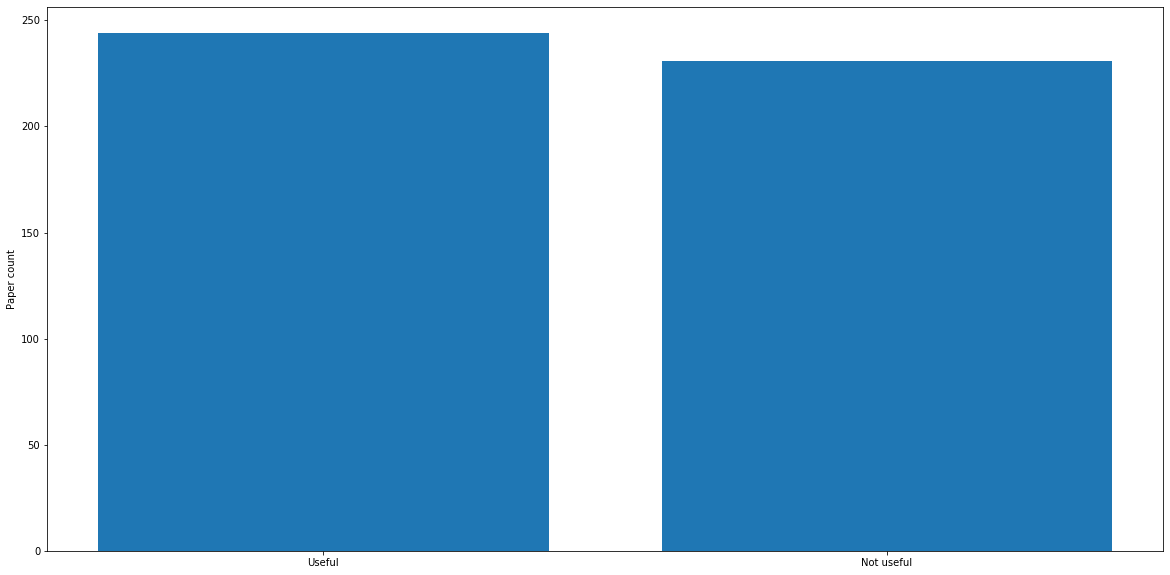

Distinct chemicals found:  737
Distinct measurement methods found:  96


In [19]:
food_statistics("cocoa_scoring.csv","cocoa_data.csv")

In [20]:
def food_statistics_usefulenss_only(filename_scoring):
    
    food_scoring_data = pd.read_excel(filename_scoring, encoding='latin1')[['PMID', 'abstract', 'mesh_terms', 'qual_terms', 'is_useful']]

    food_scoring_data_usefulness = food_scoring_data['is_useful'].tolist()
    nonuseful_count = 0
    useful_count = 0

    for elem in food_scoring_data_usefulness:
        if elem == 0.0:
            nonuseful_count = nonuseful_count + 1
        else:
            useful_count = useful_count + 1

    food_usefulness_dict = dict()
    food_usefulness_dict['Useful'] = useful_count
    food_usefulness_dict['Not useful'] = nonuseful_count
    
    print(food_usefulness_dict)

    plt.figure(figsize=(20, 10)) 
    plt.bar(food_usefulness_dict.keys(),food_usefulness_dict.values())
    plt.ylabel('Paper count')
    plt.show()
    
    #food_chemical_data = pd.read_csv(filename_chemicals, encoding='latin1')[['chemical','method']]
    
    #print('Distinct chemicals found: ', len(set(food_chemical_data['chemical'].tolist())))
    #print('Distinct measurement methods found: ', len(set(food_chemical_data['method'].tolist())))
    
    return

{'Useful': 61, 'Not useful': 32}


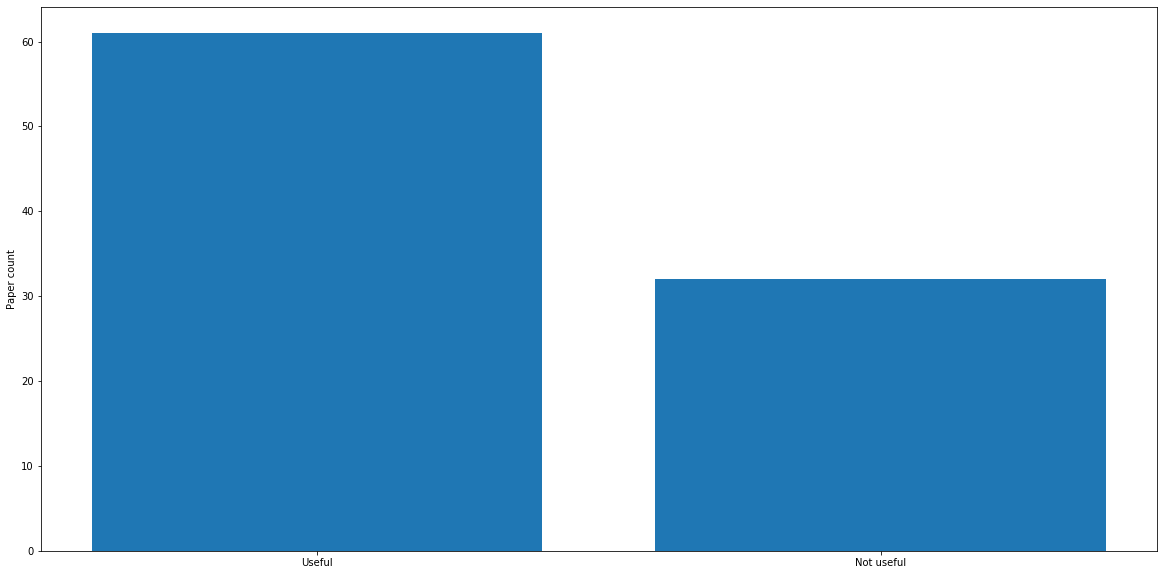

In [21]:
food_statistics_usefulenss_only('basil_scoring.xls')

{'Useful': 474, 'Not useful': 1191}


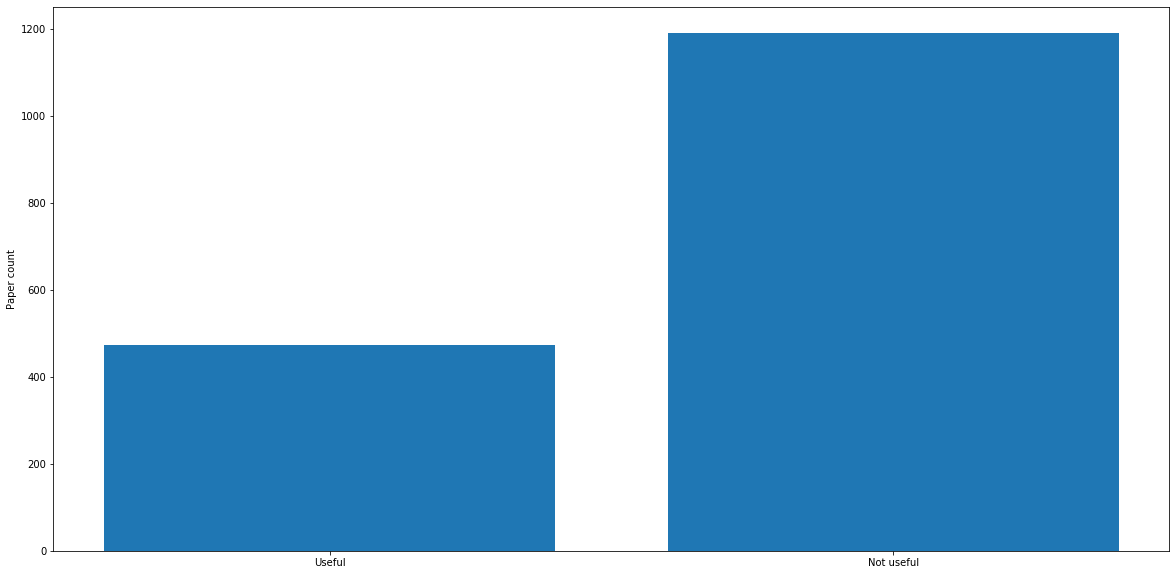

In [23]:
food_statistics_usefulenss_only('apple_scoring.xls')

In [27]:
def food_statistics_milk(filename_scoring):
    
    food_scoring_data = pd.read_csv(filename_scoring, encoding='latin1')[['PMID', 'abstract', 'paper', 'mesh_terms', 'qual_terms', 'is_useful', 'measmethod', 'chemicals']]

    food_scoring_data_usefulness = food_scoring_data['is_useful'].tolist()
    nonuseful_count = 0
    useful_count = 0

    for elem in food_scoring_data_usefulness:
        if elem == 0.0:
            nonuseful_count = nonuseful_count + 1
        else:
            useful_count = useful_count + 1

    food_usefulness_dict = dict()
    food_usefulness_dict['Useful'] = useful_count
    food_usefulness_dict['Not useful'] = nonuseful_count
    
    print(food_usefulness_dict)

    plt.figure(figsize=(20, 10)) 
    plt.bar(food_usefulness_dict.keys(),food_usefulness_dict.values())
    plt.ylabel('Paper count')
    plt.show()
    
    chemial_list = []
    
    for chem_list in food_scoring_data['chemicals'].tolist():
        for chem in chem_list:
            chemial_list.append(chem)
            
    measmethod_list = []
    
    for mm_list in food_scoring_data['measmethod'].tolist():
        for m in mm_list:
            measmethod_list.append(m)
    
    print('Distinct chemicals found: ', len(set(chemial_list)))
    print('Distinct measurement methods found: ', len(set(measmethod_list)))
    
    return

{'Useful': 131, 'Not useful': 106}


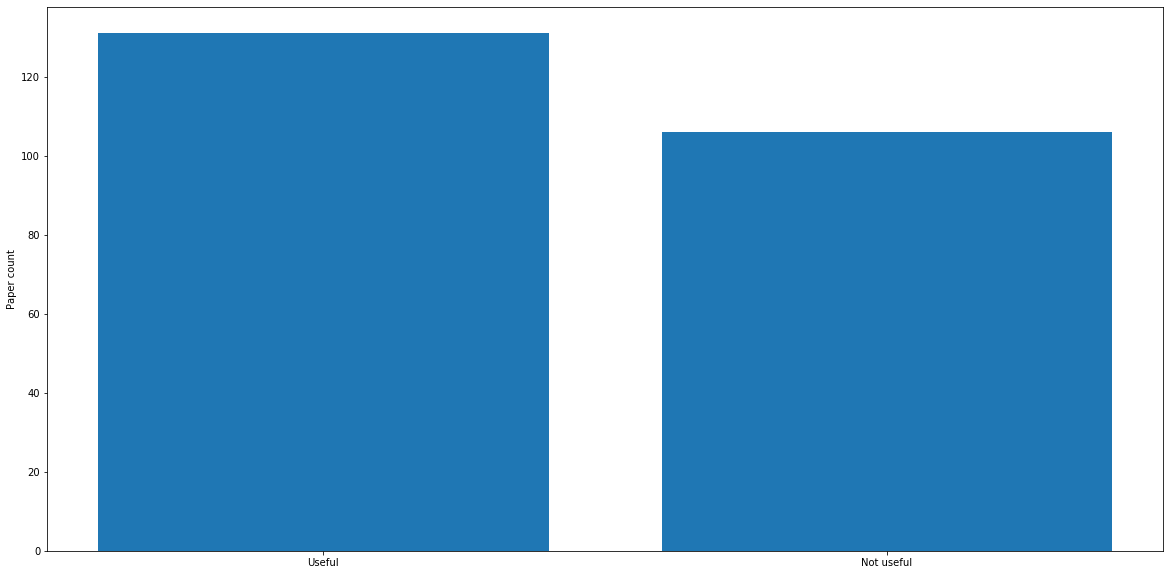

Distinct chemicals found:  81
Distinct measurement methods found:  55


In [28]:
food_statistics_milk('mBase_15Aug_abstract[chemical_gen].csv')

# Combined Plot

Ranking based on total paper count: Apple, Cocoa, Garlic, Human Milk and Basil 

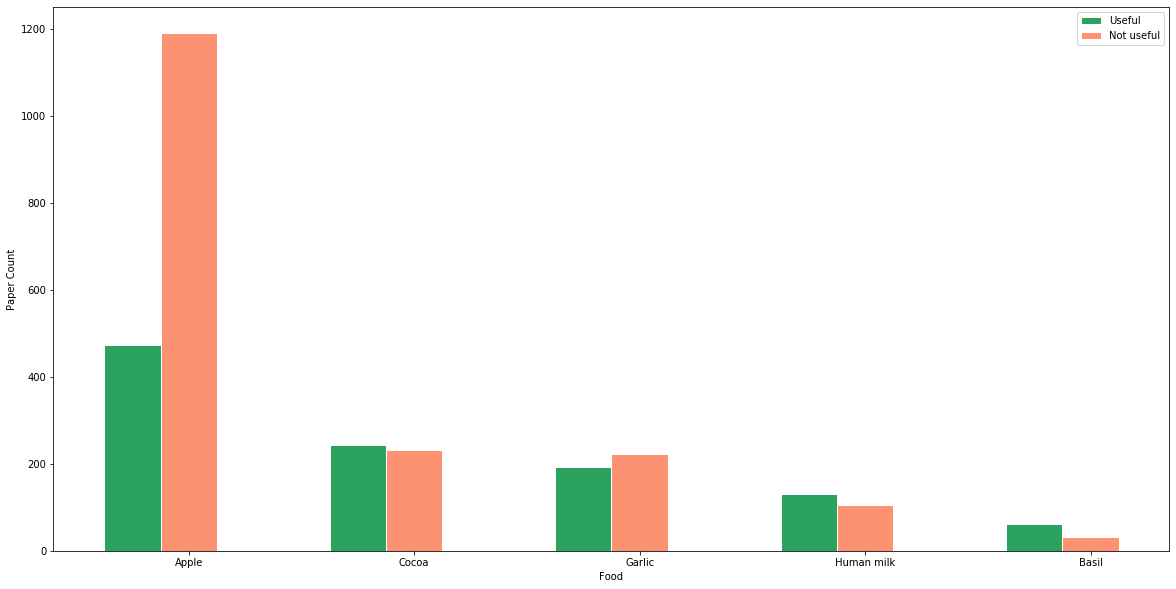

In [31]:
# set width of bar
barWidth = 0.25
 
# set height of bar # First bar is useful and second bar is not useful
useful_bar = [474,244,193,131,61]
not_useful_bar = [1191,231,222,106,32]


# Set position of bar on X axis
r1 = np.arange(len(useful_bar))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(20, 10))

# Make the plot
plt.bar(r1, useful_bar, color='#2ca25f', width=barWidth, edgecolor='white', label='Useful')
plt.bar(r2, not_useful_bar, color='#fc9272', width=barWidth, edgecolor='white', label='Not useful')
 
# Add xticks on the middle of the group bars
plt.xlabel('Food')
plt.ylabel('Paper Count')
plt.xticks([r + barWidth for r in range(len(useful_bar))], ['Apple','Cocoa','Garlic','Human milk','Basil'])
 
# Create legend & Show graphic
plt.legend()
plt.show()